In [77]:
'''
This notebook visualizes prediction results of neural_net_dense_allgather_distributed_mpi2.cpp.

The neural_net_dense_allgather_distributed_mpi2 application writes results to a file 
in ../data/tmp/ for various neural net configuration, each of which contains three 
hidden fully-connected layers and one softmax layer.
'''
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

import random
import pandas
import numpy
import time

In [142]:
# get a list of result CSV files
import glob

csv_files = glob.glob('../data/tmp/*.csv')
csv_files = sorted(csv_files, key=lambda f: f)
print '\n'.join(csv_files)

../data/tmp/0.21986_190_20_400_101.csv
../data/tmp/0.21987_210_50_400_101.csv
../data/tmp/0.21989_235_60_200_101.csv
../data/tmp/0.21989_258_20_800_101.csv
../data/tmp/0.21989_285_40_800_101.csv
../data/tmp/0.21990_232_50_200_101.csv
../data/tmp/0.21991_216_60_400_101.csv
../data/tmp/0.21991_222_30_200_101.csv
../data/tmp/0.21992_229_40_200_101.csv
../data/tmp/0.21993_202_20_200_101.csv
../data/tmp/0.21994_263_30_800_101.csv
../data/tmp/0.21994_298_50_800_101.csv
../data/tmp/0.21998_307_30_1000_101.csv
../data/tmp/0.21998_331_50_1000_101.csv
../data/tmp/0.21998_342_60_1000_101.csv
../data/tmp/0.21999_354_40_1000_101.csv
../data/tmp/0.22002_242_40_600_101.csv
../data/tmp/0.22002_317_20_1000_101.csv
../data/tmp/0.22005_224_20_600_101.csv
../data/tmp/0.22005_296_60_800_101.csv
../data/tmp/0.22006_232_30_600_101.csv
../data/tmp/0.22014_420_60_1200_101.csv
../data/tmp/0.22015_372_50_1200_101.csv
../data/tmp/0.22017_350_40_1200_101.csv
../data/tmp/0.22019_342_30_1200_101.csv
../data/tmp/0.22

In [143]:
def plot(y_test, y_predicted, tsec, neurons):
    rmse = ((y_test - y_predicted) ** 2).mean() ** .5

    tmin = tsec // 60
    tsec = tsec %  60
    thrs = tmin // 60
    tmin = tmin %  60
    tuse = '%02d:%02d:%02d' % (thrs, tmin, tsec)

    # sort to make plot look not so fuzzy
    # intact y_test & y_predicted for next iteration or algorithm!!!
    p_test, p_predicted = zip(*sorted(zip(y_test, y_predicted)))

    fig, ax = plt.subplots()
    fig.set_size_inches(16, 8)
    ax.set_ylim([0, 100])
    plt.scatter(numpy.arange(0,len(p_test)),      p_test,      c='b', s=2, label='ground truth') 
    plt.scatter(numpy.arange(0,len(p_predicted)), p_predicted, c='r', s=2, label='prediction')                                                                                                  
    plt.axis('tight')                                                                                                                           
    plt.legend()                                                                                                                                
    plt.title("Intel DAAL Neural Net: neurons=%s, time=%s, rmse=%s" % (neurons, tuse, rmse))                                                                                                                                      
    plt.grid()
    plt.show()
    plt.clf()

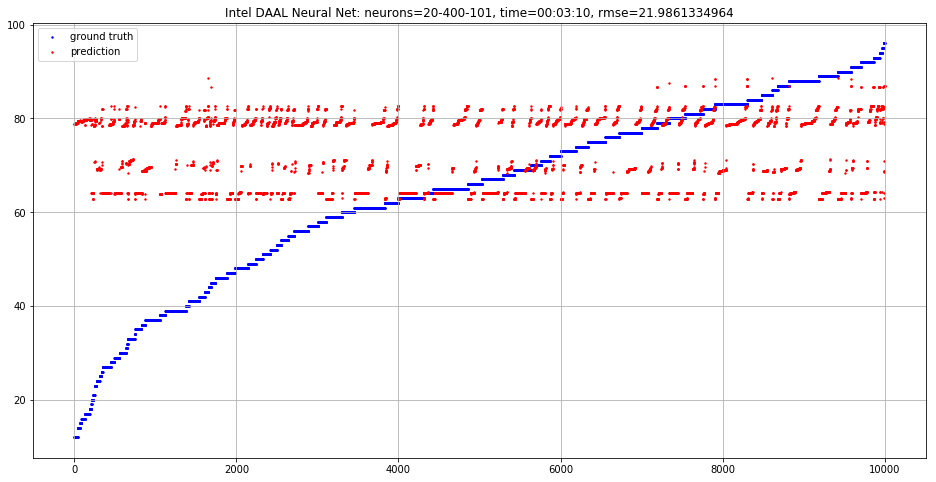

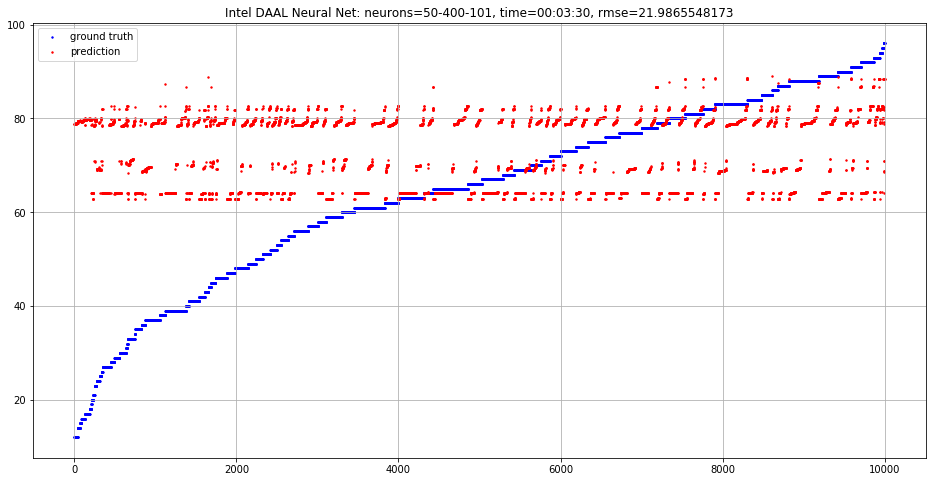

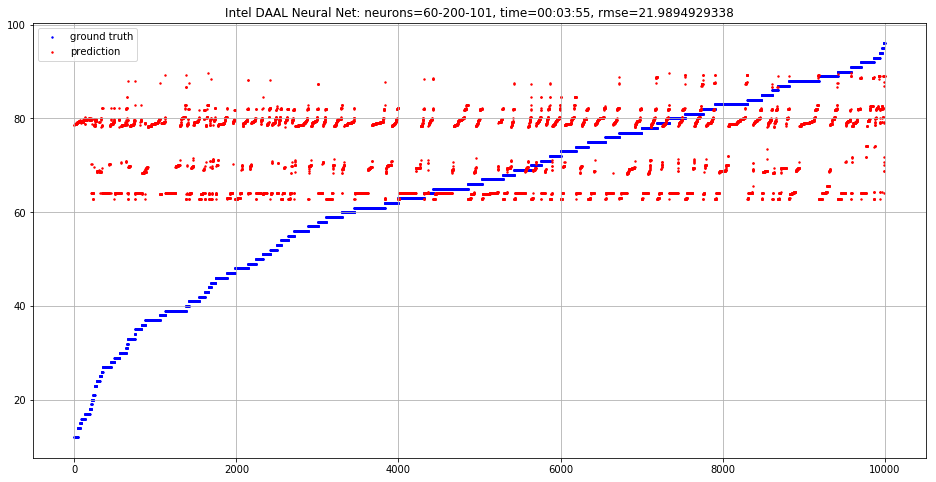

In [144]:
# show charts with top 3 least RMSE 
for csv_file in csv_files[0:3]:
    dfrm = pandas.read_csv(csv_file,header=None)
    tok = csv_file.split('_')
    plot(dfrm[0], dfrm[1], int(tok[1]), '-'.join(tok[2:5]).split('.')[0]) 


As the charts above show, the Neural Net implementation of Intel DAAL tends 
to predict values in a 'safe zone' of range [65, 85]. With the 10k randomly
selected test samples, it never predicted any value into the range [0, 50].

Its accuracy on predicting values in the range of [0, 50] is very bad!

Possible reasons of this issue may be:

1. Majority of the training sample data has labels in that zone?
2. My app chooses uniform weight/bias initialization which causes this issue?
3. DAAL has builtin generalization layer ?
4. DAAL has an incorrect implementation of Neural Net?

From the results from other implementations in ../sklearn and ../spark, reason #1
seems less likely than the other reasons.

Investigating my and DAAL code...